## Representation Quality of Elections in Turkey

### Introduction

This notebook inspecting the representation quality of the general congress elections in Turkey. The process indicates;

- Data Cleaning & Preprocessing
- Evaluation of Voter and Representative Rates
- Evaluation of Gini Coefficient
- Visualization

The dataset has been downloaded from the Turkish Statistical Institute. The data contains all the general elections from 1950 to 2018.

### Problem Statement

The main objects of this project is to show;
- How much does Congress represent the Turkish voters?
- How did it changed under different circumstances such as constitutions changes or economic crisis?

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('elections.csv')

In [2]:
df.head(13)

,party,data_type,2018,1 Kasim 2015,7 Haziran 2015,2011,2007,2002,1999,1995,...,1987,1983,1977,1973,1969,1965,1961,1957,1954,1950
0,Kayıtlı seçmen sayısı,NaN,59367469,56949009,56608817,52806322,42799303,41407027,37495217,34155981,...,26376926,19767366,21207303,16798164,14788552,13679753,12925395,12078623,10262063,8905743
1,Oy kullanan seçmen sayısı,NaN,51189444,48537695,47507467,43914948,36056293,32768161,32656070,29101469,...,24603541,18238362,15358210,11223843,9516035,9748678,10522716,9250949,9095617,7953085
2,Katılım oranı (%),NaN,"86,2","85,2","83,9","83,2","84,2","79,1","87,1","85,2",...,"93,3","92,3","72,4","66,8","64,3","71,3","81,4","76,6","88,6","89,3"
3,Geçerli oy sayısı,NaN,48631366,46555267,45121773,42813896,34822907,31414748,31119242,28040392,...,23923687,17351510,14827172,10723658,9086296,9307563,10138035,NaN,NaN,NaN
4,Yurt dışı/gümrük kapıları geçerli oy sayısı,NaN,1505809,1284964,1041470,127867,226784,114035,65254,86601,...,47942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Toplam geçerli oy sayısı,NaN,50137175,47840231,46163243,42941763,35049691,31528783,31184496,28126993,...,23971629,17351510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Milletvekili sayısı,NaN,600,550,550,550,550,550,550,550,...,450,399,450,450,450,450,450,610,541,487
7,AK PARTİ,A,21338693,23681926,18867411,21399082,16327291,10808229,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AK PARTİ,B,"42,6","49,5","40,9","49,8","46,6","34,3",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AK PARTİ,C,295,317,258,327,341,363,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   party           229 non-null    object
 1   data_type       222 non-null    object
 2   2018            30 non-null     object
 3   1 Kasim 2015    45 non-null     object
 4   7 Haziran 2015  53 non-null     object
 5   2011            43 non-null     object
 6   2007            41 non-null     object
 7   2002            48 non-null     object
 8   1999            55 non-null     object
 9   1995            38 non-null     object
 10  1991            26 non-null     object
 11  1987            26 non-null     object
 12  1983            17 non-null     object
 13  1977            30 non-null     object
 14  1973            31 non-null     object
 15  1969            32 non-null     object
 16  1965            26 non-null     object
 17  1961            19 non-null     object
 18  1957      

- Necessary packages and data have been imported and general info gathered for the data

### Functions

- New dataframe should be created from raw data with a desirable shape.
- Functions that are making necessary operations should be coded.

**List of Functions**
1. **build_df:** Creates new suitable dataframe for an election with voting rates and representative rates.
2. **all_elections:** Creates a dictionary to store all dataframes that was created by build_df.
3. **area:** Calculates the area between x-axis and the representation curve to be used for calculation of the Gini Coefficient.
4. **gini:** Calculates the Gini Coefficient for a year.
5. **all_gini:** Calculates all the Gini Coefficient year by year.
6. **plot_all:** Plots graphs for all elections.

In [4]:
def build_df(df, year):
    results = pd.DataFrame(columns = ['party', 'voting_rate', 'accu_vote', 'rep_number', 'rep_rate', 'accu_rep_rate', 'area'])
    num_of_rep_list = df.iloc[6, year:]
    num_of_rep_list = num_of_rep_list.astype(int)
    num_rep = num_of_rep_list[0]
    i=7
    while i<=(len(df)-1):
        results = results.append({'party':df.iloc[i, 0], 'voting_rate':df.iloc[i+1, year], 
                                  'rep_number':df.iloc[i+2, year], 'rep_rate':df.iloc[i+2, year]}, ignore_index=True)
        i+=3
    results.rep_number = results.rep_number.dropna().astype(int)
    results.rep_rate = results.rep_rate.dropna().astype(int) / num_rep * 100
    results.voting_rate = results.voting_rate.replace('[,]', '.', regex=True)
    results.voting_rate = pd.to_numeric(results['voting_rate'], errors='coerce')
    results = results[results.voting_rate.notna()]
    results = results.sort_values(by='voting_rate').fillna(0)
    f=0
    for f in range(0,results.party.count()):
        results.iloc[f, 2] = results.iloc[f, 1] + results.iloc[f-1, 2]
        results.iloc[f, 5] = results.iloc[f, 4] + results.iloc[f-1, 5]
    results = area(results)
    return results

In [5]:
def area(df):
    f=0
    for f in range(0,df.party.count()):
        if f==0:
            df.iloc[f, 6] = df.iloc[f, 1] * (df.iloc[f, 5]) / 2 / 10000
        else:
            df.iloc[f, 6] = df.iloc[f, 1] * (df.iloc[f, 5] + df.iloc[f-1, 5]) / 2 / 10000
    return df

In [6]:
def gini(df):
    gini = 1 - (2 * df.area.sum())
    return gini

In [7]:
def all_elections(df):
    all_elections = {}
    for i in range(2,21):
        year = str(df.columns[i])
        all_elections[year] = build_df(df, i)
    return all_elections

In [8]:
all_elections = all_elections(df)

In [9]:
def all_gini(dic, df):
    gini_df = pd.DataFrame(columns={'elections', 'gini'})
    gini_coef = {}
    for i in range(2,21):
        year = str(df.columns[i])
        new_df = pd.DataFrame.from_dict(dic[str(year)])
        gini_coef[year]= gini(new_df)
        gini_df = gini_df.append({'elections':year, 'gini':gini_coef[year]}, ignore_index=True)
    return gini_coef, gini_df

In [10]:
gini_per_year = all_gini(all_elections, df)[0]
gini_per_year_df = all_gini(all_elections, df)[1]

In [11]:
def plot_all(dic, df, gini_value):
    number_of_columns=4
    number_of_rows =6
    plt.figure(figsize=(5*number_of_columns, 5*number_of_rows))
    sns.set_style('whitegrid')
    for i in range(2,21):
        year = str(df.columns[i])
        plt.subplot(number_of_rows, number_of_columns, i-1)
        sns.set_style('whitegrid')
        plt.plot([0,100], [0,100], color='lightgray')
        sns.lineplot(x='accu_vote', y='accu_rep_rate', data=dic[str(year)], color='coral', marker="o")
        plt.title(str(year), fontname='Corbel', fontsize=15)
        plt.xlabel('Accumulated Votes', fontname='Corbel', fontsize=12)
        plt.ylabel('Accumulated Representative Rates', fontname='Corbel', fontsize=12)
        text = 'Gini Coefficient: ' + str(round(gini_value[year], 5))
        plt.text(50, 1, text, fontsize=12, fontname='Corbel')

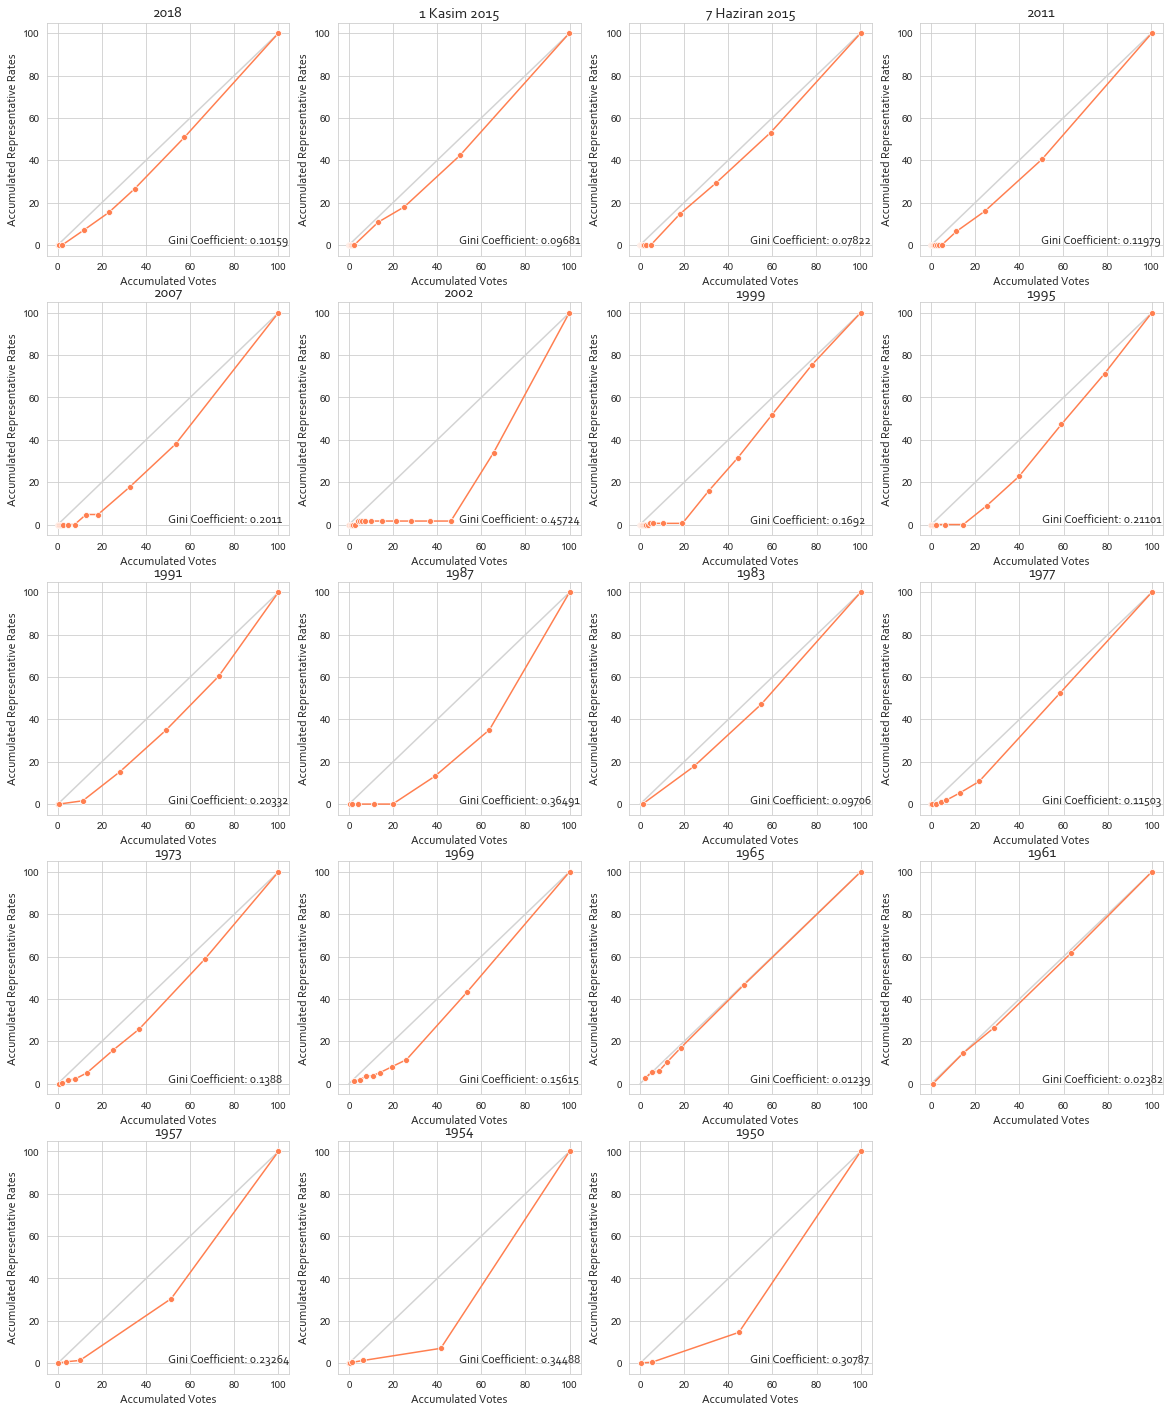

In [12]:
plot_all(all_elections, df, gini_per_year)

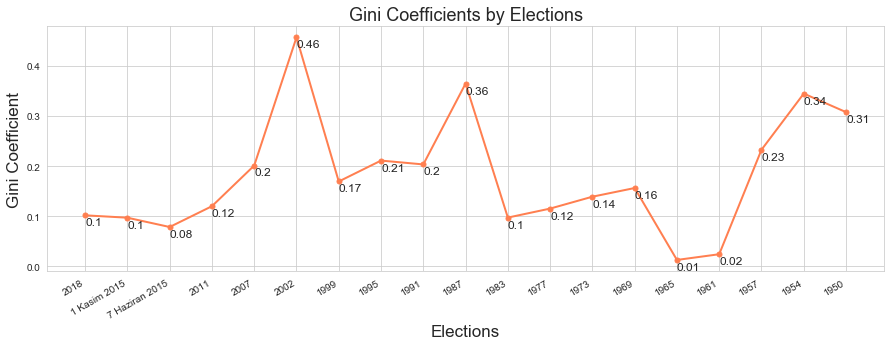

In [13]:
plt.figure(figsize=(15,5))
plt.title('Gini Coefficients by Elections', fontsize=18)
plt.ylabel('Gini Coefficient', fontsize=17)
plt.xlabel('Elections', fontsize=17)
plt.plot(gini_per_year_df.elections, gini_per_year_df.gini, 'k', color='coral', lw=2)
plt.plot(gini_per_year_df.elections, gini_per_year_df.gini, 'o', color='coral', markersize=5, label='Recovery')
for i in range(0,len(gini_per_year_df.elections)):
    plt.annotate('%s' %str(round(gini_per_year_df.gini[i], 2)), xy=(gini_per_year_df.elections[i], gini_per_year_df.gini[i]), 
                 xytext=(0, -10), textcoords="offset points", fontsize=12)
plt.gcf().autofmt_xdate()

### Result

In this project, 20 graphs have been created. 19 of them are shows representation quality election by election. It can be said that **closer the red and grey lines close to each other means higher the representation quality.** The last graph shows the Gini scores through time. **Lower Gini score means higher representation quality.**

As a result of this project, it can be said that there are three important events in the history of Turkey for the representation quality of elections in Turkey. These are;
- 1961 constitution change which brought the D'Hondt system
- 1983 law of %10 election threshold
- 2001 economic crisis

*__In 1961__*, with a new constitution, the election system changed to the D'Hondt system and this new system, until it changed before 1969 elections, *__shaped two elections that have the lowest Gini scores__*. Later, *__%10 election threshold__* constituted in 1983 and this *__caused relatively higher results in Gini Coefficient__* which means lower representation quality. Lastly, after the *__2001 financial crisis,__* nearly all the establishment political parties *__missed the election threshold by lower numbers__* and this caused the *__highest Gini score__*.